# Cirrhosis Prediction Using Machine Learning

In [35]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [2]:
#Loading dataset
data = pd.read_csv("cirrhosis.csv")

In [3]:
#Printing top rows of dataset
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
# Check for missing values
data.isnull().sum()

# Handle missing values (example: fill with mean)
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [5]:
# Drop duplicate rows from the DataFrame
data = data.drop_duplicates()

In [6]:
# Save the cleaned dataset as a CSV file
data_new= data.to_csv("cleaned_cirrhosis.csv", index=False)

In [8]:
#Loading the cleaned file
data = pd.read_csv("cleaned_cirrhosis.csv")

In [9]:
#Descriptive Statistics for the Dataset
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,191.077413,0.424972,73.697982,1848.437803,48.965657,53.479887,97.020057,1.019547,0.875673
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,369.510563,3.530000,97.648387,1717.000000,122.556346,124.702128,253.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,369.510563,3.770000,100.750000,1982.655769,135.750000,127.750000,315.500000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [10]:
#Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

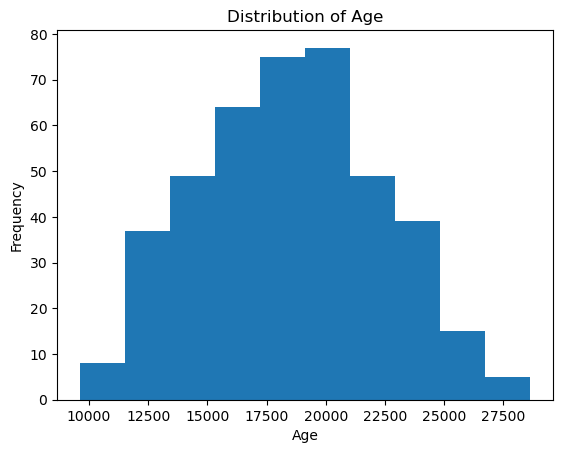

In [11]:
# Plotting the distribution of age
plt.hist(data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

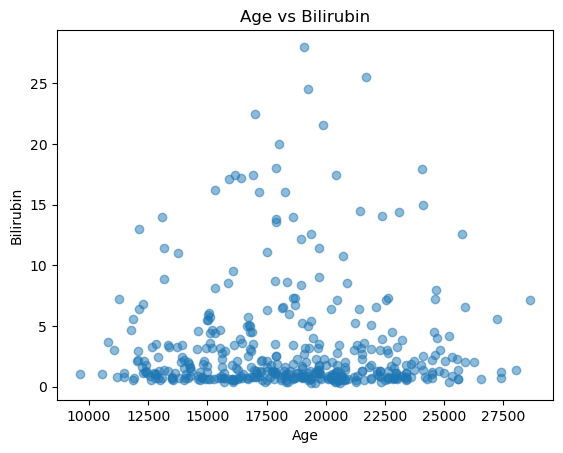

In [12]:
#Scatter plot between Age and Bilirubin
plt.scatter(data['Age'], data['Bilirubin'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Bilirubin')
plt.title('Age vs Bilirubin')
plt.show()

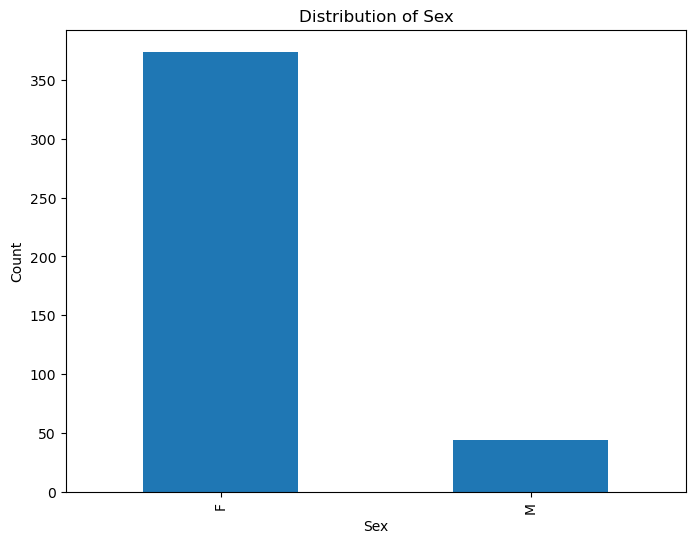

In [14]:
# Visualizing the distribution of the 'Sex' variable
plt.figure(figsize=(8, 6))
data['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

In [13]:
# Calculate and print the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                     ID    N_Days       Age  Bilirubin  Cholesterol   Albumin  \
ID             1.000000 -0.354305  0.037136  -0.062154     0.020507 -0.128924   
N_Days        -0.354305  1.000000 -0.125934  -0.403953    -0.114683  0.430829   
Age            0.037136 -0.125934  1.000000   0.002362    -0.130578 -0.182350   
Bilirubin     -0.062154 -0.403953  0.002362   1.000000     0.337809 -0.314177   
Cholesterol    0.020507 -0.114683 -0.130578   0.337809     1.000000 -0.054572   
Albumin       -0.128924  0.430829 -0.182350  -0.314177    -0.054572  1.000000   
Copper        -0.063529 -0.319775  0.053617   0.405228     0.123024 -0.225532   
Alk_Phos      -0.227543  0.131080 -0.041326   0.103842     0.140112 -0.086570   
SGOT          -0.007801 -0.198015 -0.131087   0.392107     0.337282 -0.187761   
Tryglicerides -0.021199 -0.126912  0.018278   0.371490     0.276828 -0.080804   
Platelets     -0.075573  0.147495 -0.145948  -0.013347     0.150683  0.156384   
Prothrombin   -0.191176 -0.1

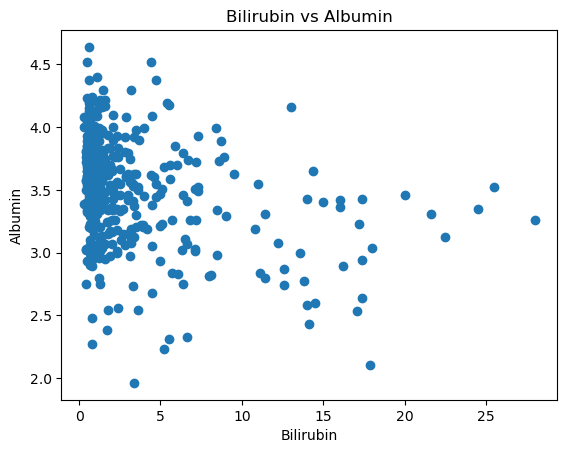

In [15]:
#Scatter plot between Bilirubin and Albumin
plt.scatter(data['Bilirubin'], data['Albumin'])
plt.xlabel('Bilirubin')
plt.ylabel('Albumin')
plt.title('Bilirubin vs Albumin')
plt.show()

<Figure size 800x600 with 0 Axes>

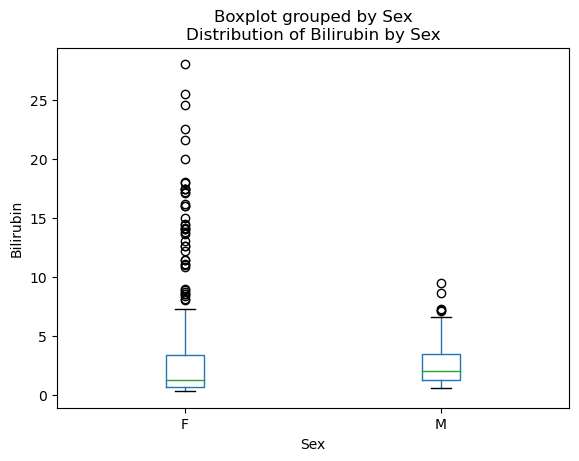

In [16]:
# Boxplot of Bilirubin Distribution by Sex
plt.figure(figsize=(8, 6))
data.boxplot(column='Bilirubin', by='Sex', grid=False)
plt.xlabel('Sex')
plt.ylabel('Bilirubin')
plt.title('Distribution of Bilirubin by Sex')
plt.show()

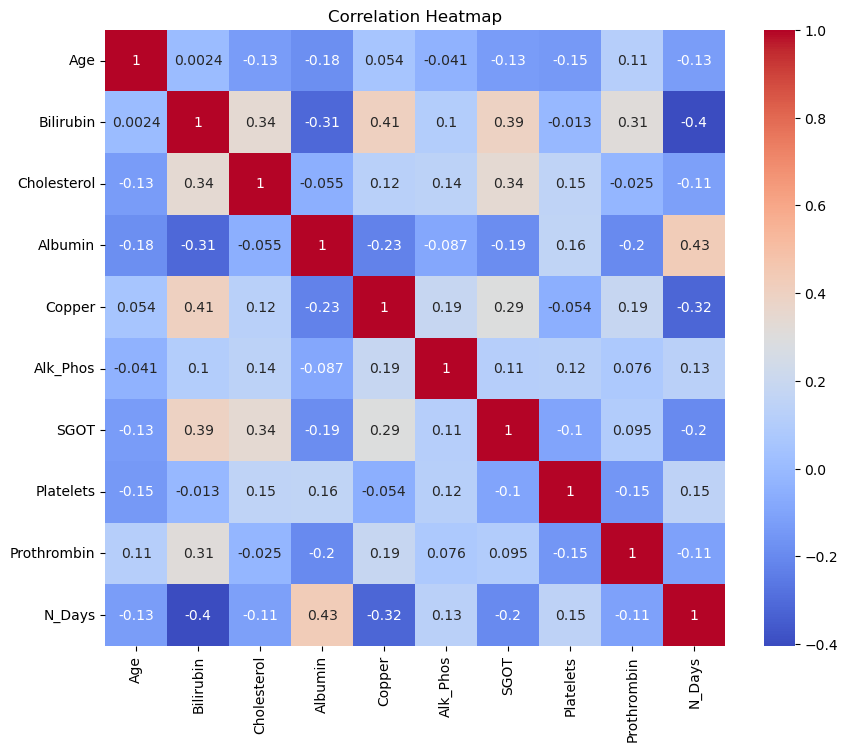

In [17]:
#Plot the correlation Heat Map
corr_matrix = data[['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Platelets', 'Prothrombin', 'N_Days']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Handling Missing Values
data = data.dropna()  # Drop rows with missing values

# Convert Categorical Variables to Category Data Type
data['Sex'] = data['Sex'].astype('category')
data['Ascites'] = data['Ascites'].astype('category')
data['Hepatomegaly'] = data['Hepatomegaly'].astype('category')
data['Spiders'] = data['Spiders'].astype('category')
data['Edema'] = data['Edema'].astype('category')
data['Drug'] = data['Drug'].astype('category')
data['Status'] = data['Status'].astype('category')

# Scaling Numerical Variables
data['Age'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min())

In [19]:
# Feature Engineering
data['IsMale'] = np.where(data['Sex'] == 'M', 1, 0)
data['HasAscites'] = np.where(data['Ascites'] == 'Y', 1, 0)
data['HasHepatomegaly'] = np.where(data['Hepatomegaly'] == 'Y', 1, 0)
data['HasSpiders'] = np.where(data['Spiders'] == 'Y', 1, 0)
data['HasEdema'] = np.where(data['Edema'] == 'Y', 1, 0)

In [20]:
print(data.head())

   ID  N_Days Status             Drug       Age Sex Ascites Hepatomegaly  \
0   1     400      D  D-penicillamine  0.622822   F       Y            Y   
1   2    4500      C  D-penicillamine  0.578364   F       N            Y   
2   3    1012      D  D-penicillamine  0.839597   M       N            N   
3   4    1925      D  D-penicillamine  0.545664   F       N            Y   
4   5    1504     CL          Placebo  0.226748   F       N            Y   

  Spiders Edema  ...    SGOT  Tryglicerides  Platelets  Prothrombin  Stage  \
0       Y     Y  ...  137.95          172.0      190.0         12.2    4.0   
1       Y     N  ...  113.52           88.0      221.0         10.6    3.0   
2       N     S  ...   96.10           55.0      151.0         12.0    4.0   
3       Y     S  ...   60.63           92.0      183.0         10.3    4.0   
4       Y     N  ...  113.15           72.0      136.0         10.9    3.0   

   IsMale  HasAscites  HasHepatomegaly  HasSpiders  HasEdema  
0       0  

In [21]:
# Calculate descriptive statistics
summary_stats = data.describe()
print(summary_stats)

               ID       N_Days         Age   Bilirubin  Cholesterol  \
count  312.000000   312.000000  312.000000  312.000000   312.000000   
mean   156.500000  2006.362179    0.455146    3.256090   369.510563   
std     90.210864  1123.280843    0.202856    4.530315   221.257085   
min      1.000000    41.000000    0.000000    0.300000   120.000000   
25%     78.750000  1191.000000    0.305991    0.800000   255.750000   
50%    156.500000  1839.500000    0.450845    1.350000   322.000000   
75%    234.250000  2697.250000    0.583508    3.425000   392.250000   
max    312.000000  4556.000000    1.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  312.000000  312.000000    312.000000  312.000000     312.000000   
mean     3.520000   97.648387   1982.655769  122.556346     124.702128   
std      0.419892   85.338190   2140.388824   56.699525      61.926753   
min      1.960000    4.000000    289.000000   26.350000      33.

In [22]:
# Perform t-test
ascites_group = data[data['Ascites'] == 'Y']['Age']
non_ascites_group = data[data['Ascites'] == 'N']['Age']
t_statistic, p_value = stats.ttest_ind(ascites_group, non_ascites_group)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 4.196323793345829
P-Value: 3.546800975813622e-05


In [23]:
# Perform chi-square test
contingency_table = pd.crosstab(data['Ascites'], data['HasAscites'])
chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_statistic)
print("P-Value:", p_value)

Chi-Square Statistic: 298.0755931712963
P-Value: 8.650460530442112e-67


In [24]:
# Perform correlation analysis
correlation = data['Bilirubin'].corr(data['Albumin'])
print("Correlation:", correlation)

Correlation: -0.3346378910930872


In [26]:
# Assuming you have a DataFrame called 'data' with columns including 'Age', 'Bilirubin', 'Cholesterol', etc.

# Create a new column 'Corriohsis' initialized with 0 (no corriohsis)
data['Corriohsis'] = 0

# Apply rules to set 'Corriohsis' based on other attributes
data.loc[(data['Age'] > 0.5) & (data['Bilirubin'] > 0.25), 'Corriohsis'] = 1

# Repeat this process for other rules and conditions based on your domain knowledge

# Print the updated DataFrame
print(data)

      ID  N_Days Status             Drug       Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  0.622822   F       Y            Y   
1      2    4500      C  D-penicillamine  0.578364   F       N            Y   
2      3    1012      D  D-penicillamine  0.839597   M       N            N   
3      4    1925      D  D-penicillamine  0.545664   F       N            Y   
4      5    1504     CL          Placebo  0.226748   F       N            Y   
..   ...     ...    ...              ...       ...  ..     ...          ...   
307  308    1153      C  D-penicillamine  0.669169   F       N            Y   
308  309     994      C          Placebo  0.613899   F       N            N   
309  310     939      C  D-penicillamine  0.691214   F       N            N   
310  311     839      C  D-penicillamine  0.224701   F       N            N   
311  312     788      C          Placebo  0.131797   F       N            N   

    Spiders Edema  ...  Tryglicerides  Platelets  P

In [38]:
# Define the features and target variable
features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'IsMale', 'HasAscites', 'HasHepatomegaly', 'HasSpiders', 'HasEdema']
target = 'Corriohsis'

In [39]:
# Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

In [40]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

C:\Users\gourj\anaconda3\anaconda new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7619047619047619


In [42]:
# Assuming you have performed logistic regression and obtained predictions 'y_pred' on the test set

# Print classification report
print(classification_report(y_test, y_pred))

# Interpret the classification report
# Precision: The ability of the model to correctly identify positive instances (cirrhosis) out of the total instances predicted as positive.
# Recall: The ability of the model to correctly identify positive instances (cirrhosis) out of the actual positive instances.
# F1-score: The weighted average of precision and recall, providing a balanced measure of model performance.
# Support: The number of occurrences of each class in the test set.

# Additionally, you can interpret the coefficients of the logistic regression model
# Assuming you have fit the model and obtained the coefficients 'coef'

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Create a dictionary to store the coefficients and their corresponding feature names
coefficients_dict = dict(zip(feature_names, coefficients))

# Sort the coefficients based on their absolute values in descending order
sorted_coefficients = {k: v for k, v in sorted(coefficients_dict.items(), key=lambda item: abs(item[1]), reverse=True)}

# Print the sorted coefficients
for feature, coefficient in sorted_coefficients.items():
    print(f"{feature}: {coefficient}")

# Interpret the coefficients
# Positive coefficients indicate that an increase in the corresponding feature value increases the likelihood of cirrhosis.
# Negative coefficients indicate that an increase in the corresponding feature value decreases the likelihood of cirrhosis.
# The magnitude of the coefficient represents the strength of the relationship between the feature and the likelihood of cirrhosis.


              precision    recall  f1-score   support

           0       0.81      0.78      0.79        37
           1       0.70      0.73      0.72        26

    accuracy                           0.76        63
   macro avg       0.75      0.76      0.76        63
weighted avg       0.76      0.76      0.76        63

Age: 3.801823449731464
IsMale: 1.1588194428417242
Albumin: -1.1518400358793797
HasSpiders: -1.0944603667943424
HasHepatomegaly: 0.921578397946593
HasAscites: 0.5761899340988903
Prothrombin: 0.37364000134564285
HasEdema: 0.14303305923334367
Bilirubin: 0.03515483180294421
SGOT: -0.017241554719194103
Copper: -0.001761744999574048
Tryglicerides: -0.0005757999490835127
Platelets: -0.00029749026234099655
Cholesterol: 9.750084823920138e-05
Alk_Phos: -2.8842166211988413e-05


In [43]:
# Assuming you have fitted the logistic regression model and obtained predictions 'y_pred' on the test set

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

# Interpret the evaluation metrics
# Assuming the positive class is represented by label 1
true_positive = confusion_mat[1, 1]
true_negative = confusion_mat[0, 0]
false_positive = confusion_mat[0, 1]
false_negative = confusion_mat[1, 0]

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
print(f'Accuracy: {accuracy}')

# Precision: TP / (TP + FP)
precision = true_positive / (true_positive + false_positive)
print(f'Precision: {precision}')

# Recall: TP / (TP + FN)
recall = true_positive / (true_positive + false_negative)
print(f'Recall: {recall}')

# F1-score: 2 * (Precision * Recall) / (Precision + Recall)
f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1-score: {f1}')

Accuracy: 0.7619047619047619
Precision: 0.7037037037037037
Recall: 0.7307692307692307
F1-score: 0.7169811320754716
Confusion Matrix:
[[29  8]
 [ 7 19]]
Accuracy: 0.7619047619047619
Precision: 0.7037037037037037
Recall: 0.7307692307692307
F1-score: 0.7169811320754716


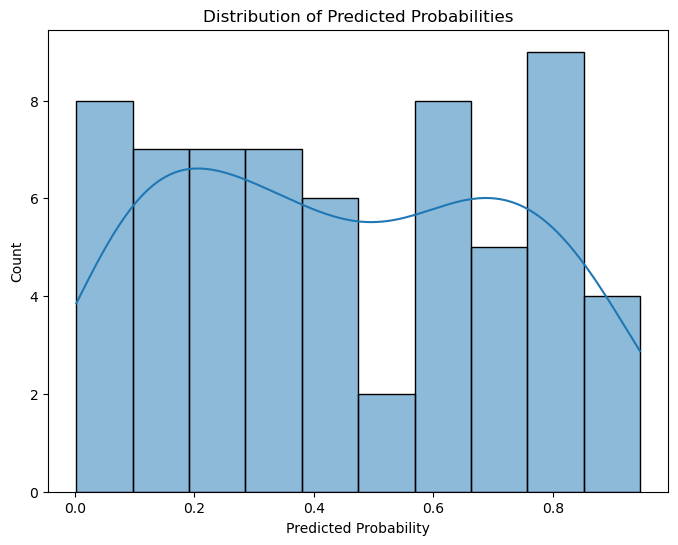

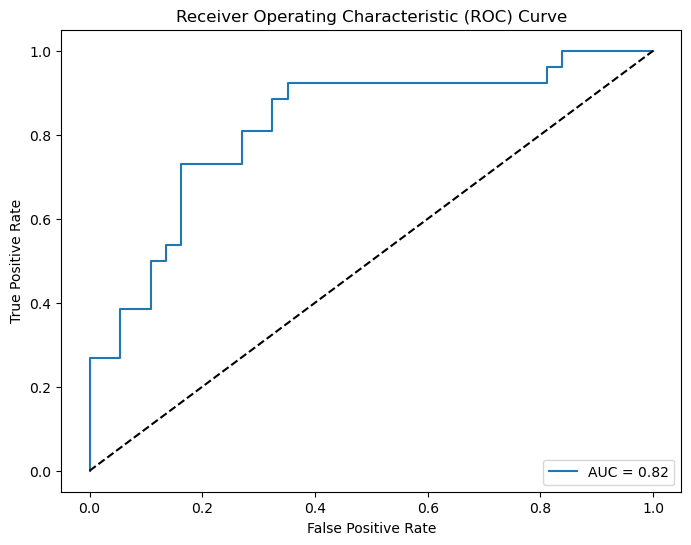

In [44]:
# Assuming you have the predicted probabilities stored in 'y_pred_proba' variable

# Calculate the predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Communicate the predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba[:, 1], bins=10, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities')
plt.show()

# Calculate the predicted classes
y_pred = model.predict(X_test)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()